 **Data Augmentation in Deep Learning (TensorFlow/Keras)**

# What is Data Augmentation in Deep Learning?
**Definition:**

Data augmentation is the process of creating new training data from your existing dataset by applying small, realistic transformations.

>The goal is to make your model more robust and generalized without actually collecting new data.

## Why use Data Augmentation?
- Prevents **overfitting** (model memorization instead of learning)
 - Improves **generalization** (better on unseen data)
 - Useful when **dataset is small**
 - Makes models more **robust**
 - Increases diversity of training data

## Example in Computer Vision
If you have only 1 image, instead of collecting more, you can:

- Flip them horizontally
- Rotate slightly (e.g., ±15°)
- Zoom in/out
- Change brightness/contrast
- Add noise

> **Result:** Your 1 image can become any or  even 10,000+ variations.

##  In this notebook:
 - We will load a single image (`image.jpg`)
 - Apply transformations with **different `fill_mode` values**
 - Save augmented images into their own folders
- Visualize sample outputs
 - Compare all fill modes side by side


# Setup

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [3]:
# Define base path where folders exist
base_path = r"C:\Users\Lenovo\OneDrive\Desktop\Python Everyday work\Github work\Data_Aurgumentaion"


In [4]:
# Create subfolders for each fill_mode
fill_modes = ['nearest', 'reflect', 'wrap', 'constant']
for mode in fill_modes:
    save_dir = os.path.join(base_path, f"fill_mode_{mode}")
    os.makedirs(save_dir, exist_ok=True)

In [5]:
print(" Folder structure ready!")

 Folder structure ready!


# Load Image
- We will use `load_img()` to load Image, 
- then convert it into a numpy array with `img_to_array()`.

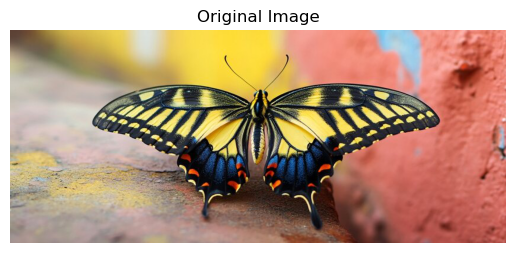

In [7]:
img_path = os.path.join(base_path, "image.JPG")  # Place your image here
img = load_img(img_path)
x = img_to_array(img)
x = x.reshape((1,) + x.shape)  # reshape into (1, height, width, channels)

plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()


# Apply Augmentation for Each Fill Mode
For each fill_mode, we will:
 - Define ImageDataGenerator with transformations
 - Generate 20 images
 - Save them into their respective folders
 - Display 2 samples inline

## Data Augmentation – fill_mode='nearest'

In [23]:
save_dir = os.path.join(base_path, "fill_mode_nearest")
os.makedirs(save_dir, exist_ok=True)

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=save_dir,
                          save_prefix="cat_nearest",
                          save_format="jpeg"):
    i += 1
    if i > 20:  # Save 20 images
        break

print(" 20 images saved in fill_mode_nearest")


 20 images saved in fill_mode_nearest


## Data Augmentation – fill_mode='reflect'

In [24]:
save_dir = os.path.join(base_path, "fill_mode_reflect")
os.makedirs(save_dir, exist_ok=True)

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect'
)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=save_dir,
                          save_prefix="cat_reflect",
                          save_format="jpeg"):
    i += 1
    if i > 20:
        break

print(" 20 images saved in fill_mode_reflect")


 20 images saved in fill_mode_reflect


## Data Augmentation – fill_mode='wrap'

In [25]:
save_dir = os.path.join(base_path, "fill_mode_wrap")
os.makedirs(save_dir, exist_ok=True)

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='wrap'
)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=save_dir,
                          save_prefix="cat_wrap",
                          save_format="jpeg"):
    i += 1
    if i > 20:
        break

print(" 20 images saved in fill_mode_wrap")


 20 images saved in fill_mode_wrap


## Data Augmentation – fill_mode='constant'

In [26]:
save_dir = os.path.join(base_path, "fill_mode_constant")
os.makedirs(save_dir, exist_ok=True)

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant'
)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=save_dir,
                          save_prefix="cat_constant",
                          save_format="jpeg"):
    i += 1
    if i > 20:
        break

print(" 20 images saved in fill_mode_constant")


 20 images saved in fill_mode_constant


## Show Random Samples from Each Mode

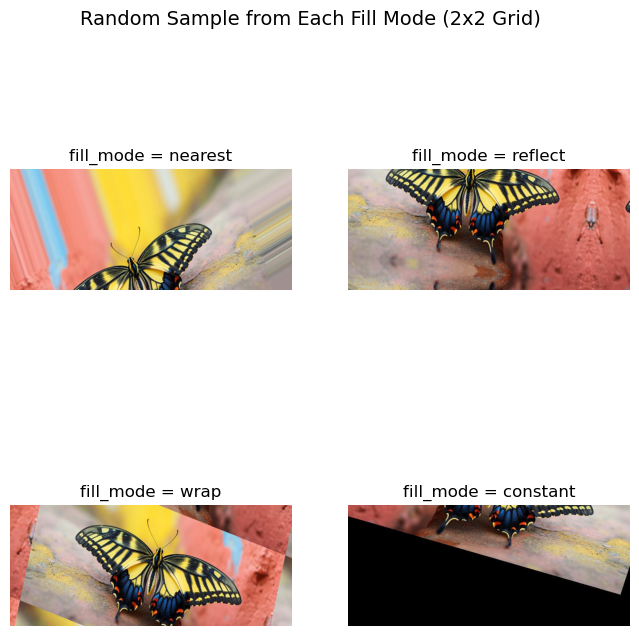

In [29]:
import random   #  make sure this is imported

fill_modes = ['nearest', 'reflect', 'wrap', 'constant']

fig, ax = plt.subplots(2, 2, figsize=(8,8))  # 2x2 grid

for i, mode in enumerate(fill_modes):
    folder_path = os.path.join(base_path, f"fill_mode_{mode}")
    files = os.listdir(folder_path)
    
    row, col = divmod(i, 2)  # convert index to 2x2 grid position
    
    if len(files) > 0:   # safety check
        # pick a random file
        sample_file = random.choice(files)
        sample_path = os.path.join(folder_path, sample_file)
        sample_img = load_img(sample_path)
        
        ax[row, col].imshow(sample_img)
        ax[row, col].axis("off")
        ax[row, col].set_title(f"fill_mode = {mode}")
    else:
        ax[row, col].text(0.5, 0.5, "No Images", ha='center', va='center', fontsize=12)
        ax[row, col].axis("off")
        ax[row, col].set_title(mode)

plt.suptitle("Random Sample from Each Fill Mode (2x2 Grid)", fontsize=14)
plt.show()


# Conclusion

In this notebook, we learned:

* What Data Augmentation is and why it is important in Deep Learning
* How to use Keras `ImageDataGenerator` to apply transformations
* How the parameter `fill_mode` works with 4 options: nearest, reflect, wrap, constant
* How to save augmented images into separate folders for each mode
* How to visualize results: individual samples and a 2x2 comparison grid

**Key Takeaway:**
    
Data Augmentation increases dataset size & diversity without collecting new data.
It helps prevent overfitting, improves generalization, and makes models more robust.


# Streamlit App Code
The full code is saved in **app.py** inside the project.

run :
```python
streamlit run app.py


# Streamlit App Demonstration

##  App Look
This is how the app looks when you first open it.

![App Look](Output/1_App_Look.PNG)


## Adding Images & Selecting Mode
Here we upload images and choose the augmentation mode.

![Add & Select Mode](Output/2_Add_Select_Mode.PNG)



## Augmented Images Generated
After choosing the mode and clicking **Generate**, augmented images are displayed, and we get the option to **download them as ZIP**.

![Augmented Images Generated](Output/3_Aurgumented_Images_Genrated.PNG)
